In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [5]:
df.shape

(891, 12)

We have 891 rows and 12 columns in dataset

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In this dataframe integer, float and  object type of data

# Checking the Null Values in the dataframe

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age has 177 missing values.
Cabin has 687 missing values.
Embarked has only 2 missing values.

In [8]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Univariate Analysis

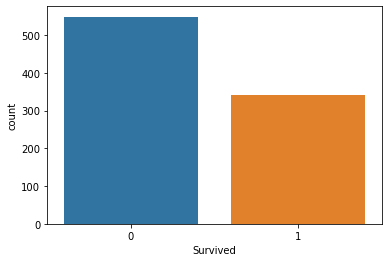

In [11]:
# making a countplot for"Survived" column
sn.countplot(df['Survived']);

countplot of survived and not survived

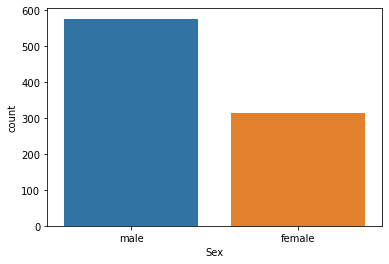

In [48]:
# making a countplot for "Sex" column
sn.countplot(df['Sex']);

<AxesSubplot:xlabel='Survived', ylabel='count'>

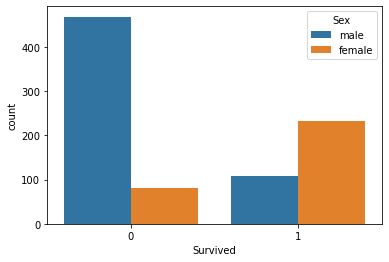

In [33]:
# number of survivors Gender wise
sn.countplot(x='Survived',data=df,hue='Sex')

 Above plot shows that the Male vs Female Survived

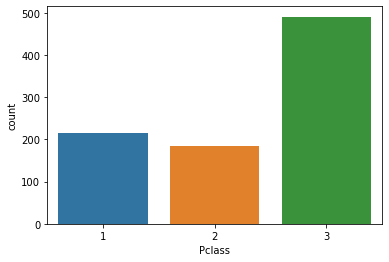

In [32]:
# making a count plot for"Pclass" column
sn.countplot(data=df, x='Pclass');

<AxesSubplot:xlabel='Pclass', ylabel='count'>

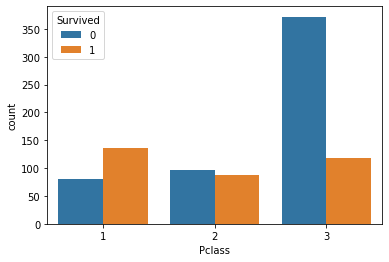

In [49]:
sn.countplot(x='Pclass',data=df,hue='Survived')

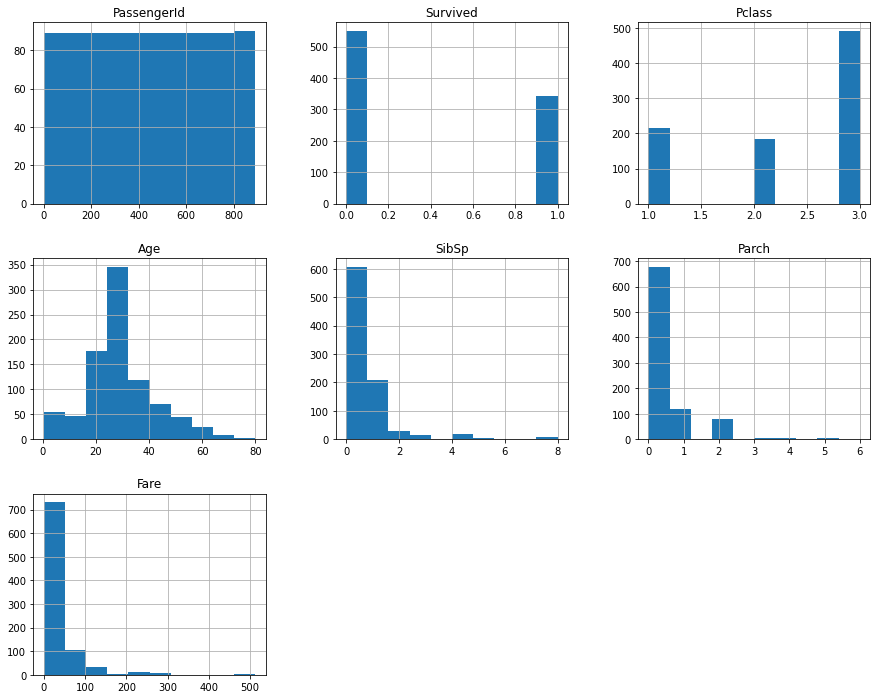

In [50]:
df.hist(bins=10,figsize=(15,12))
plt.show()

Above plot shows the histogram of different columns.

<AxesSubplot:xlabel='PassengerId', ylabel='Density'>

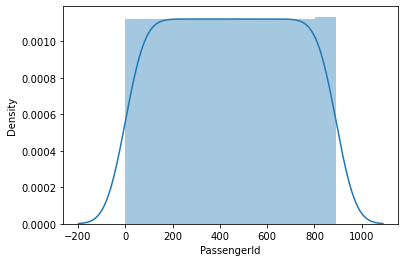

In [15]:
sn.distplot(df["PassengerId"])

<AxesSubplot:xlabel='Survived', ylabel='Density'>

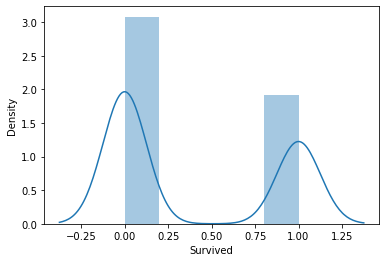

In [18]:
sn.distplot(df["Survived"])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

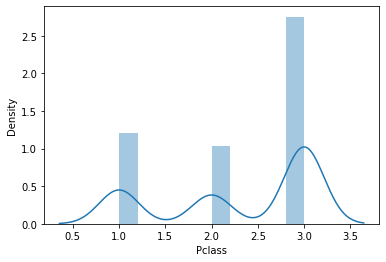

In [19]:
sn.distplot(df["Pclass"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

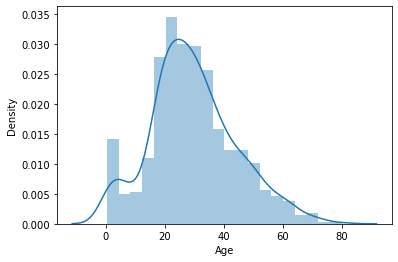

In [22]:
sn.distplot(df["Age"])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

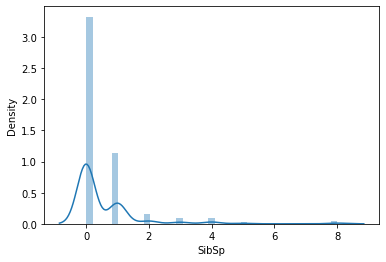

In [23]:
sn.distplot(df["SibSp"])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

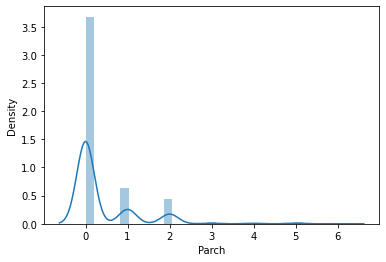

In [24]:
sn.distplot(df["Parch"])

# Multivariate Analysis

In [29]:
df = df.drop(['Name', 'Ticket', 'Cabin'],axis = 1)

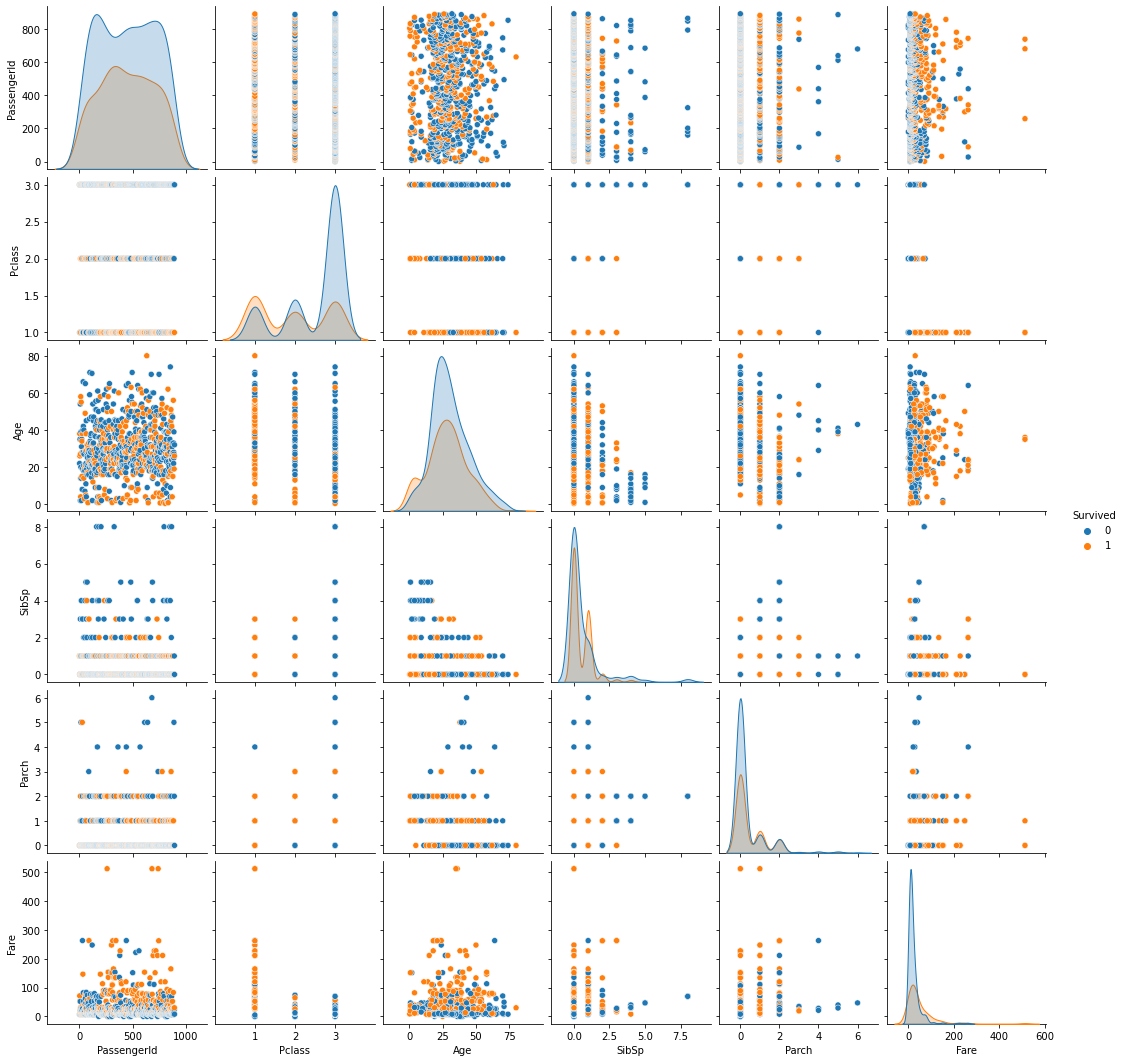

In [30]:
sn.pairplot(df,hue='Survived')

# Identifying Outliers

<AxesSubplot:xlabel='Age'>

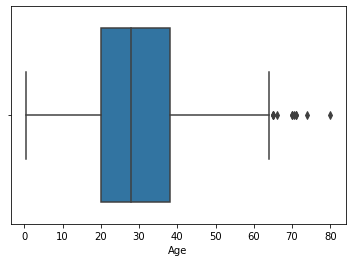

In [36]:
sn.boxplot(df['Age'])

<AxesSubplot:xlabel='Fare'>

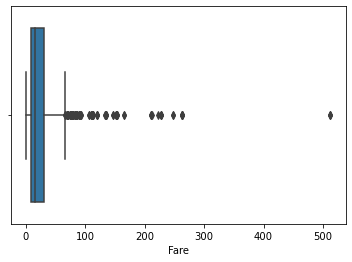

In [37]:
sn.boxplot(df['Fare'])

# Missing Value Treatment

In [38]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [41]:
print(df['Embarked'].mode())

0    S
dtype: object


In [45]:
df['Embarked'] = df['Embarked'].fillna('S')

In [46]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [47]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

There is no missing value

# Importing Label Encoder

In [51]:
columns=df.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [96]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [97]:
df = df.apply(LabelEncoder().fit_transform)

In [98]:
df["Survived"].unique

<bound method Series.unique of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

In [99]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,2,1,28,1,0,18,2
1,1,1,0,0,52,1,0,207,0
2,2,1,2,0,34,0,0,41,2
3,3,1,0,0,48,1,0,189,2
4,4,0,2,1,48,0,0,43,2


# Checking for Coorelation

<AxesSubplot:>

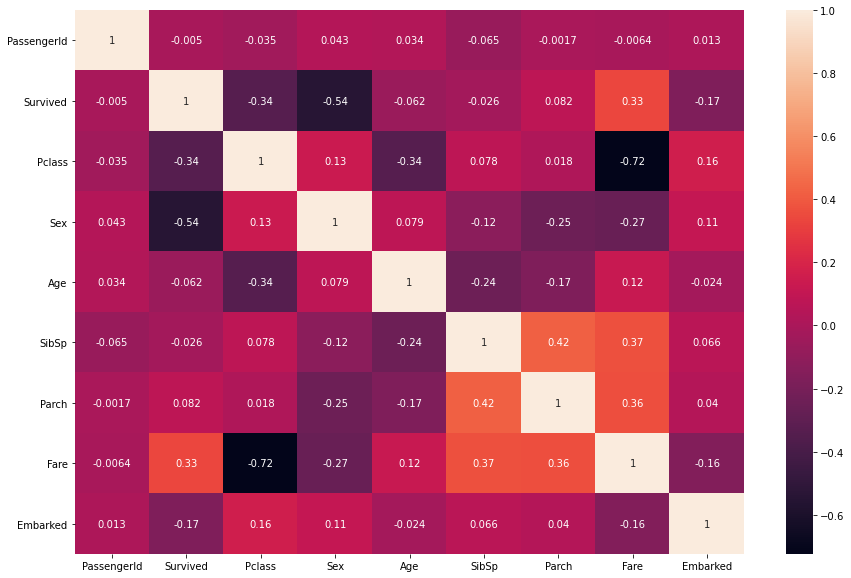

In [56]:
plt.figure(figsize=(15,10))
sn.heatmap(df.corr(),annot=True)

# Outliers Removal

In [57]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df [(z<3).all(axis=1)]

In [58]:
new_df.shape

(846, 9)

In [59]:
df.shape

(891, 9)

In [60]:
(45/891)

0.050505050505050504

# Find the best Random state

In [100]:
X = df.drop(['Survived'] , axis=1)
y = df['Survived']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [102]:
from sklearn.preprocessing import StandardScaler#scaling the features
scaler= StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
from sklearn.linear_model import LogisticRegression

In [105]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [109]:
predictions = logmodel.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [110]:
accuracy=confusion_matrix(y_test,predictions)

In [111]:
accuracy

array([[128,  26],
       [ 38,  76]], dtype=int64)

In [112]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7611940298507462

In [113]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [114]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       154
           1       0.75      0.67      0.70       114

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



In [129]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [117]:
models = [  RandomForestClassifier(),AdaBoostClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = [ 'RandomForestClassifier', 'DecisionTreeClassifier','AdaBoostClassifier',
               'GradientBoostingClassifier']

acc = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred, y_test))

models = {'Modelling Algorithm': model_names, 'Accuracy': acc}

In [118]:
models_df = pd.DataFrame(models)

In [119]:
models_df

,Modelling Algorithm,Accuracy
0,RandomForestClassifier,0.794776
1,DecisionTreeClassifier,0.772388
2,AdaBoostClassifier,0.716418
3,GradientBoostingClassifier,0.824627


# Hyper parameter tuning

In [120]:
model, test_accuracy = [], []

In [121]:
# DecisionTreeClassifier
param_dict = {'criterion': ['gini', 'entropy'], 'max_depth': [
    4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150]}
dt_clf = GridSearchCV(DecisionTreeClassifier(),
                      param_grid=param_dict, scoring='accuracy', cv=10)

dt_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             scoring='accuracy')

In [122]:
dt_clf.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [123]:
dt_clf.best_score_

0.8056835637480798

In [124]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.7910447761194029


In [125]:
#AdaBoostClassifier
param_dict = {'n_estimators': list(range(1, 201, 20))}

adaboost_clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(
    criterion='gini', max_depth=1000),  algorithm='SAMME.R'),
    param_grid=param_dict)

adaboost_clf.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1000)),
             param_grid={'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [126]:
adaboost_clf.best_params_

{'n_estimators': 121}

In [127]:
adaboost_clf.best_score_

0.7848774193548389

In [128]:
pred = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Adaboost Accuracy:", accuracy)

Adaboost Accuracy: 0.7126865671641791


1.Logistic Regression = 0.76
2.DecisionTreeClassifier = 0.79
3.Adaboost Classifier = 0.71

Among,Three Classifier DecisionTreeClassifier is the best model.

# Saving the model

In [142]:
import joblib
joblib.dump(pred,"prediction.pkl")

['prediction.pkl']